In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [3]:
df_data_all = pd.read_csv("./KPIs.csv")

In [4]:
# Elimino las últimas tres columnas
df_data = df_data_all.iloc[ : , :-3]

In [5]:
# Convierto los nombres de las columnas en un arreglo
arr_columns = df_data.columns.to_numpy()
arr_columns

array(['CATEGORIA', 'TEMA', 'DATO BUSCADO', '¿Se tiene?', 'ORIGEN',
       'Campo agregado', 'Nombre del campo'], dtype=object)

# FILTRACIÓN POR LA COLUMNA CATEGORIA

In [6]:
#Obtengo todas las categorias que existen
categories = df_data['CATEGORIA'].unique()
categories

array(['Cap 1000', 'Energía eléctrica', 'Suministro de Agua',
       'Servicios Profesionales', 'Viáticos', 'Orden social', 'Inmuebles',
       'Papeleria', 'Alimentos', 'TI'], dtype=object)

In [7]:
#Trabajo unicamente con la categoria de la posicion 3
category = categories[3]

## TEMA

In [59]:
#Creo una función que me regresa todos los tema de una categoria
def temas(category):
    """
    Está función es para obtener todos los temas en forma de un arreglo que contenga la categoria enviada en el parametro.
    """
    df_data[df_data['CATEGORIA'] == category]
    arr_tema = df_data[df_data['CATEGORIA'] == category]['TEMA'].unique()
    return arr_tema

In [17]:
def filter_column(data, column_of_value, value, column_filter):
    """
    Se va a filtar todos los datos con respecto al valor de una columna proporcionada, 
    pero únicamente se va a mostrar los valores de la columna filtrada.
    ES NECESARIO QUE EN DATA SEA TODA LA TABLA DE LOS DATOS.
    COLUMN_OF_VALUE es únicamente el nombre la columna.
    COLUMN_FILTER es únicamente el nombre la columna.
    """
    print(data[ data[column_of_value] == value][column_filter])
    # arr_tema = data[column_of_value == value][column_filter].unique()
    # return arr_tema


In [18]:
arr = filter_column(df_data,'CATEGORIA', category, 'TEMA')
print(arr)

25    Contratos
26    Contratos
27    Contratos
28    Contratos
29    Contratos
30    Contratos
31    Contratos
32    Contratos
33    Contratos
34    Contratos
35    Contratos
Name: TEMA, dtype: object
None


In [61]:
tema = arr[0]
tema

'Contratos'

# Datos

In [109]:
def data(category, tema):
    data_total = df_data['¿Se tiene?'].loc[(df_data['CATEGORIA'] == category) & (df_data['TEMA'] == tema)].size
    data_without_information = data_without_information = df_data['¿Se tiene?'].loc[(df_data['CATEGORIA'] == category) & (df_data['TEMA'] == tema) & (df_data['¿Se tiene?'] == 'No') ].count()
    data_information = data_total - data_without_information
    return data_total, data_without_information, data_information


In [108]:
tema = 'Congresos'
category = 'Orden social'

data_total = df_data['¿Se tiene?'].loc[(df_data['CATEGORIA'] == category) & (df_data['TEMA'] == tema)].size
data_without_information = df_data['¿Se tiene?'].loc[(df_data['CATEGORIA'] == category) & (df_data['TEMA'] == tema) & (df_data['¿Se tiene?'] == 'No') ].count()

print(data_total)
print(data_without_information)

2
2


In [96]:
#data(category,tema)

them=dashboard['Tema']
for j in range(theme.size):
    print(data(category, theme[j])[0], data(category, theme[j])[1],data(category, theme[j])[2])
    print()

4 1 3


2 0 2


2 1 1


2 1 1




# FUENTE DE INFORMACIÓN

In [64]:
def source_information(category):
    """
    Esta función es para obtener la fuente de información de todos los temas que tiene la categoria.
    """
    source_information = df_data['ORIGEN'].loc[(df_data['CATEGORIA'] == category)].unique()
    return source_information

# Prueba de todo el código anterior

In [110]:
dashboard = {
        "Categoria": "",
        "Tema": [],
        "Datos": [],
        "Datos_con_informacion": [],
        "Datos_sin_informacion": [],
        "Source_information": ""
    }
df_data_all = pd.read_csv("./KPIs.csv")
        # Elimino las últimas tres columnas
df_data = df_data_all.iloc[ : , :-3]
        #Todas las Categorias
categories = df_data['CATEGORIA'].unique()
print(categories)

category = categories[5]
arr_datos, arr_without_data, arr_with_data = 0,0,0

dashboard['Categoria'] = category
theme = temas(category)

dashboard['Tema'] = theme
for j in range(theme.size):
    dashboard['Datos'].append(data(category, theme[j])[0])
    dashboard['Datos_sin_informacion'].append(data(category, theme[j])[1])
    dashboard['Datos_con_informacion'].append(data(category, theme[j])[2])
dashboard['Source_information'] = source_information(category)

print(dashboard)

['Cap 1000' 'Energía eléctrica' 'Suministro de Agua'
 'Servicios Profesionales' 'Viáticos' 'Orden social' 'Inmuebles'
 'Papeleria' 'Alimentos' 'TI']
{'Categoria': 'Orden social', 'Tema': array(['Costo', 'Eventos', 'Congresos', 'Capacitación'], dtype=object), 'Datos': [4, 2, 2, 2], 'Datos_con_informacion': [3, 2, 0, 0], 'Datos_sin_informacion': [1, 0, 2, 2], 'Source_information': array(['Facturas', nan], dtype=object)}


In [91]:
print(dashboard)

{'Categoria': 'Orden social', 'Tema': array(['Costo', 'Eventos', 'Congresos', 'Capacitación'], dtype=object), 'Datos': [4, 2, 2, 2], 'Datos_con_informacion': [3, 2, 1, 1], 'Datos_sin_informacion': [1, 0, 1, 1], 'Source_information': array(['Facturas', nan], dtype=object)}


In [89]:
def percentage(dashboard):
    """
    Función que me regresa el porcentaje de los datos con información y sin información de un tema
    """
    arr_percentage_without_information = []
    arr_percentage_with_information = []
    for i in range(len(dashboard['Datos'])):
        porcentaje_con_informacion = (dashboard['Datos_con_informacion'][i]*100)/dashboard['Datos'][i]
        porcentaje_sin_informacion = 100-porcentaje_con_informacion
        print(porcentaje_con_informacion, porcentaje_sin_informacion)
        arr_percentage_without_information.append(porcentaje_sin_informacion)
        arr_percentage_with_information.append(porcentaje_con_informacion)
    return arr_percentage_with_information, arr_percentage_without_information


In [111]:

percentage(dashboard)



75.0 25.0
100.0 0.0
0.0 100.0
0.0 100.0


([75.0, 100.0, 0.0, 0.0], [25.0, 0.0, 100.0, 100.0])

## Gráficación


In [69]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [70]:
import matplotlib.pyplot as plt

In [71]:
title = dashboard['Categoria']
etiquetas = dashboard['Tema']
valores = dashboard['Datos']

Text(0.5, 1.0, 'Categorias de title Energía eléctrica')

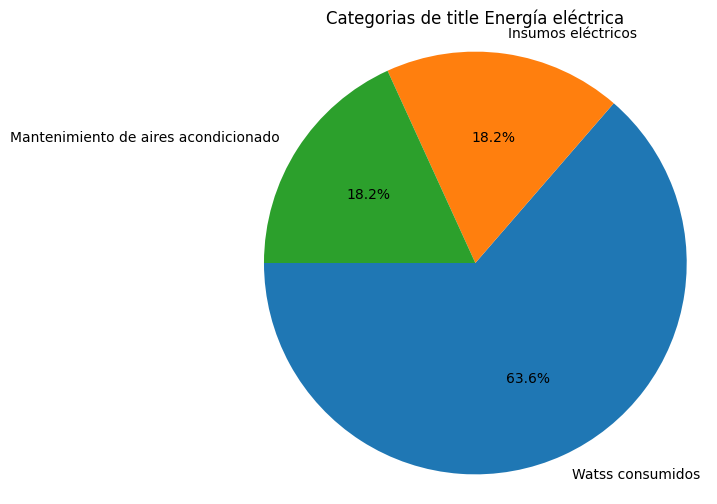

In [72]:
plt.figure(figsize=(6, 6))  # Opcional: ajusta el tamaño de la figura

plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=180)
# labels: Etiquetas para cada categoría.
# autopct: Formato de las etiquetas mostrando el porcentaje.
# startangle: Ángulo inicial de inicio del gráfico (opcional).

plt.axis('equal')  # Esto asegura que el gráfico de pastel sea un círculo.

plt.title(f'Categorias de title { title }')

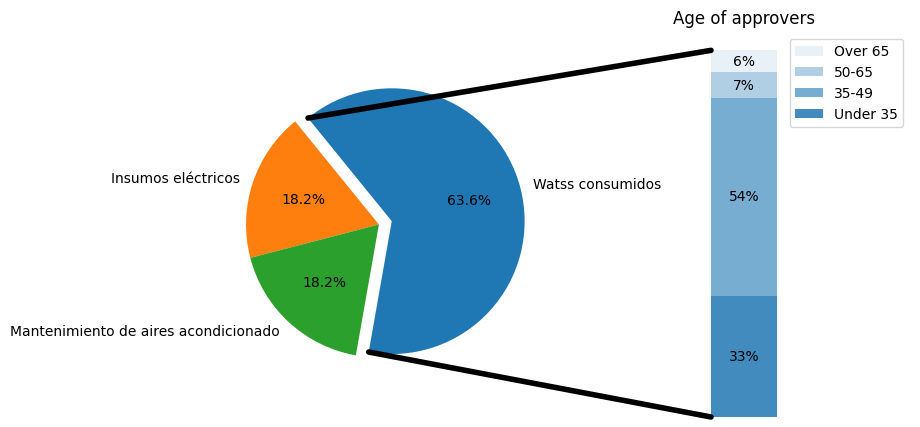

In [73]:
from matplotlib.patches import ConnectionPatch
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=.1)

# pie chart parameters
overall_ratios = valores
labels = etiquetas
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -220 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.33, .54, .07, .06]
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Información')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

In [82]:
type(percentage(dashboard))


tuple